In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 10)
pd.set_option('display.max_rows', 10)

no display found. Using non-interactive Agg backend


In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

In [177]:
com = pd.read_csv('combined.csv', index_col=0)
com

,osebuildingid,datayear,buildingname,buildingtype,taxparcelidentificationnumber,...,totalghgemissions,ghgemissionsintensity,secondlargestpropertyuse,thirdlargestpropertyusetypegfa,primarypropertytype
0,1,2022,MAYFLOWER PARK HOTEL,NonResidential,0659000030,...,264.5,2.99,NaN,NaN,NaN
1,2,2022,PARAMOUNT HOTEL,NonResidential,0659000220,...,155.3,1.75,15064.0,NaN,NaN
2,3,2022,WESTIN HOTEL (Parent Building),NonResidential,0659000475,...,1963.7,2.59,117783.0,0.0,NaN
3,5,2022,HOTEL MAX,NonResidential,0659000640,...,298.2,4.86,NaN,NaN,NaN
4,8,2022,WARWICK SEATTLE HOTEL,NonResidential,0659000970,...,409.0,3.60,68009.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
14514,50540,2019,EVEN HOTELS & STAYBRIDGE SUITES,NonResidential,1983200540,...,0.0,0.00,NaN,NaN,NaN
14515,50542,2019,Aegis Living in Ravenna,NonResidential,5100400245,...,13.8,0.20,8580.0,NaN,Senior Care Community
14516,50543,2019,AEGIS WEST SEATTLE,NonResidential,9276200910,...,139.9,2.10,10606.0,NaN,Senior Care Community
14517,50633,2019,BROADWAY ESTATES LLC,Multifamily MR (5-9),6850700510,...,37.5,0.60,NaN,NaN,Multifamily Housing


In [178]:
com.pop('primarypropertytype')

0                          NaN
1                          NaN
2                          NaN
3                          NaN
4                          NaN
                 ...          
14514                      NaN
14515    Senior Care Community
14516    Senior Care Community
14517      Multifamily Housing
14518      Multifamily Housing
Name: primarypropertytype, Length: 14519, dtype: object

In [179]:
com.columns

Index(['osebuildingid', 'datayear', 'buildingname', 'buildingtype',
       'taxparcelidentificationnumber', 'address', 'city', 'state', 'zipcode',
       'latitude', 'longitude', 'neighborhood', 'councildistrictcode',
       'yearbuilt', 'numberoffloors', 'numberofbuildings', 'propertygfatotal',
       'propertygfabuilding_s', 'propertygfaparking', 'energystarscore',
       'siteeuiwn_kbtu_sf', 'siteeui_kbtu_sf', 'siteenergyuse_kbtu',
       'siteenergyusewn_kbtu', 'sourceeuiwn_kbtu_sf', 'sourceeui_kbtu_sf',
       'epapropertytype', 'largestpropertyusetype',
       'largestpropertyusetypegfa', 'secondlargestpropertyusetype',
       'thirdlargestpropertyusetype', 'electricity_kwh', 'steamuse_kbtu',
       'naturalgas_therms', 'compliancestatus', 'complianceissue',
       'electricity_kbtu', 'naturalgas_kbtu', 'totalghgemissions',
       'ghgemissionsintensity', 'secondlargestpropertyuse',
       'thirdlargestpropertyusetypegfa'],
      dtype='object')

In [180]:
com.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14519 entries, 0 to 14518
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   osebuildingid                   14519 non-null  int64  
 1   datayear                        14519 non-null  int64  
 2   buildingname                    14519 non-null  object 
 3   buildingtype                    14519 non-null  object 
 4   taxparcelidentificationnumber   14519 non-null  object 
 5   address                         14519 non-null  object 
 6   city                            14516 non-null  object 
 7   state                           14516 non-null  object 
 8   zipcode                         14353 non-null  float64
 9   latitude                        14515 non-null  float64
 10  longitude                       14515 non-null  float64
 11  neighborhood                    14513 non-null  object 
 12  councildistrictcode             14488

In [181]:
com.isnull().sum()

osebuildingid                        0
datayear                             0
buildingname                         0
buildingtype                         0
taxparcelidentificationnumber        0
                                  ... 
naturalgas_kbtu                   1958
totalghgemissions                  336
ghgemissionsintensity              338
secondlargestpropertyuse          5133
thirdlargestpropertyusetypegfa    8779
Length: 42, dtype: int64

In [241]:
deleted_col = ['buildingname',
             'taxparcelidentificationnumber',
             'address',
             'city',
             'state',
             #'ghgemissionsintensity',
             'complianceissue',
             'energystarscore',
             'siteenergyusewn_kbtu',
             'siteeuiwn_kbtu_sf',
             'siteeui_kbtu_sf',
             #'electricity_kbtu',
             'propertygfabuilding_s',
             'sourceeuiwn_kbtu_sf','epapropertytype']
df = com.drop(columns=deleted_col)
df.shape 

(14519, 29)

In [242]:
df.isnull().sum()

osebuildingid                        0
datayear                             0
buildingtype                         0
zipcode                            166
latitude                             4
                                  ... 
naturalgas_kbtu                   1958
totalghgemissions                  336
ghgemissionsintensity              338
secondlargestpropertyuse          5133
thirdlargestpropertyusetypegfa    8779
Length: 29, dtype: int64

In [243]:
values = {'secondlargestpropertyusetype': 'none',
          'secondlargestpropertyuse': 0, # this is same as secondlargestespropertyusetypegfa
          'thirdlargestpropertyusetype': 'none', 
          'thirdlargestpropertyusetypegfa': 0,
          'steamuse_kbtu': 0, 
          'naturalgas_therms': 0, 
          'naturalgas_kbtu': 0,
          'numberofbuildings': 0}
df.fillna(value=values, inplace=True)
df.isnull().sum()

osebuildingid                       0
datayear                            0
buildingtype                        0
zipcode                           166
latitude                            4
                                 ... 
naturalgas_kbtu                     0
totalghgemissions                 336
ghgemissionsintensity             338
secondlargestpropertyuse            0
thirdlargestpropertyusetypegfa      0
Length: 29, dtype: int64

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14519 entries, 0 to 14518
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   osebuildingid                   14519 non-null  int64  
 1   datayear                        14519 non-null  int64  
 2   buildingtype                    14519 non-null  object 
 3   zipcode                         14353 non-null  float64
 4   latitude                        14515 non-null  float64
 5   longitude                       14515 non-null  float64
 6   neighborhood                    14513 non-null  object 
 7   councildistrictcode             14488 non-null  float64
 8   yearbuilt                       14519 non-null  int64  
 9   numberoffloors                  14519 non-null  int64  
 10  numberofbuildings               14519 non-null  float64
 11  propertygfatotal                14519 non-null  int64  
 12  propertygfaparking              14519

In [245]:
df[df.datayear==2019].numberofbuildings

10938    0.0
10939    0.0
10940    0.0
10941    0.0
10942    0.0
        ... 
14514    0.0
14515    0.0
14516    0.0
14517    0.0
14518    0.0
Name: numberofbuildings, Length: 3581, dtype: float64

In [246]:
df.isnull().sum().max()

1050

In [247]:
df.dropna(inplace=True)
df.shape

(13250, 29)

In [248]:
com.shape

(14519, 42)

In [249]:
df.columns

Index(['osebuildingid', 'datayear', 'buildingtype', 'zipcode', 'latitude',
       'longitude', 'neighborhood', 'councildistrictcode', 'yearbuilt',
       'numberoffloors', 'numberofbuildings', 'propertygfatotal',
       'propertygfaparking', 'siteenergyuse_kbtu', 'sourceeui_kbtu_sf',
       'largestpropertyusetype', 'largestpropertyusetypegfa',
       'secondlargestpropertyusetype', 'thirdlargestpropertyusetype',
       'electricity_kwh', 'steamuse_kbtu', 'naturalgas_therms',
       'compliancestatus', 'electricity_kbtu', 'naturalgas_kbtu',
       'totalghgemissions', 'ghgemissionsintensity',
       'secondlargestpropertyuse', 'thirdlargestpropertyusetypegfa'],
      dtype='object')

In [250]:
sum(df.isnull().sum())

0

In [251]:
df.to_csv('cleaned_combine.csv')

## LabelEncoder

In [254]:
cat = ['buildingtype',
     'zipcode',
     'neighborhood',
     'councildistrictcode',
     'largestpropertyusetype',
     'secondlargestpropertyusetype',
     'thirdlargestpropertyusetype',
     'compliancestatus']

In [255]:
from sklearn.preprocessing import LabelEncoder
for c in cat:
    le = LabelEncoder()
    df[c] = le.fit_transform(df[c])

In [256]:
df

,osebuildingid,datayear,buildingtype,zipcode,latitude,...,naturalgas_kbtu,totalghgemissions,ghgemissionsintensity,secondlargestpropertyuse,thirdlargestpropertyusetypegfa
0,1,2022,4,1,47.61220,...,1362900.0,264.5,2.99,0.0,0.0
1,2,2022,4,1,47.61307,...,2751630.0,155.3,1.75,15064.0,0.0
2,3,2022,4,1,47.61367,...,5699300.0,1963.7,2.59,117783.0,0.0
3,5,2022,4,1,47.61412,...,3058990.0,298.2,4.86,0.0,0.0
4,8,2022,4,16,47.61375,...,7362130.0,409.0,3.60,68009.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
14507,50531,2019,2,3,47.68899,...,0.0,8.8,0.20,11308.0,0.0
14515,50542,2019,4,11,47.69050,...,0.0,13.8,0.20,8580.0,0.0
14516,50543,2019,4,12,47.58099,...,2340118.0,139.9,2.10,10606.0,0.0
14517,50633,2019,3,2,47.62366,...,489112.0,37.5,0.60,0.0,0.0


In [257]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13250 entries, 0 to 14518
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   osebuildingid                   13250 non-null  int64  
 1   datayear                        13250 non-null  int64  
 2   buildingtype                    13250 non-null  int64  
 3   zipcode                         13250 non-null  int64  
 4   latitude                        13250 non-null  float64
 5   longitude                       13250 non-null  float64
 6   neighborhood                    13250 non-null  int64  
 7   councildistrictcode             13250 non-null  int64  
 8   yearbuilt                       13250 non-null  int64  
 9   numberoffloors                  13250 non-null  int64  
 10  numberofbuildings               13250 non-null  float64
 11  propertygfatotal                13250 non-null  int64  
 12  propertygfaparking              13250

In [258]:
df.drop(columns=['osebuildingid','datayear','councildistrictcode','ghgemissionsintensity','electricity_kbtu'],inplace=True)

## Outlier

In [259]:
df.describe()

,buildingtype,zipcode,latitude,longitude,neighborhood,...,compliancestatus,naturalgas_kbtu,totalghgemissions,secondlargestpropertyuse,thirdlargestpropertyusetypegfa
count,13250.000000,13250.000000,13250.000000,13250.000000,13250.000000,...,13250.000000,1.325000e+04,13250.000000,13250.000000,13250.000000
mean,3.152075,11.261962,47.625031,-122.334964,7.127019,...,0.113283,1.539370e+06,144.154521,17835.774415,2782.782943
std,1.229207,7.200082,0.047043,0.027132,5.928202,...,0.570950,8.068112e+06,2756.115563,46444.037502,15277.913329
min,0.000000,0.000000,47.499170,-122.414250,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.000000,5.000000,47.601450,-122.350985,3.000000,...,0.000000,0.000000e+00,6.800000,0.000000,0.000000
50%,3.000000,10.000000,47.619410,-122.332630,6.000000,...,0.000000,3.568360e+05,32.200000,400.000000,0.000000
75%,4.000000,17.000000,47.657290,-122.318980,9.000000,...,0.000000,1.352057e+06,94.800000,14200.000000,0.000000
max,7.000000,29.000000,47.733870,-122.258640,25.000000,...,3.000000,4.327243e+08,310839.600000,750000.000000,480625.000000


In [260]:
df = df[df.totalghgemissions<df.totalghgemissions.quantile(0.95)]
df.shape

(12587, 24)

In [261]:
df.to_csv('labeled_bench_marking_all.csv')

## Split Dataset

In [262]:
X = df.drop(columns=['totalghgemissions'])
y = df['totalghgemissions']

In [263]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8810, 23)
(8810,)
(3777, 23)
(3777,)


In [264]:
scaler = StandardScaler().fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test),columns = X_test.columns)
X_train.head()

,buildingtype,zipcode,latitude,longitude,neighborhood,...,naturalgas_therms,compliancestatus,naturalgas_kbtu,secondlargestpropertyuse,thirdlargestpropertyusetypegfa
0,0.705389,-0.334562,-0.035338,-0.038649,-0.201839,...,-0.234180,-0.19526,-0.223991,-0.414059,-0.202877
1,3.212911,-0.891428,0.780268,2.094738,0.298968,...,0.962211,-0.19526,0.893219,-0.414059,-0.202877
2,-0.966293,0.083087,-1.337734,-1.975029,2.803002,...,-0.664645,-0.19526,-0.626009,-0.414059,-0.202877
3,0.705389,-1.448293,-0.271562,0.030926,-0.702645,...,0.142797,-0.19526,0.127994,-0.119278,0.536815
4,-0.966293,-1.309077,0.488996,0.440320,-0.201839,...,-0.664645,-0.19526,-0.626009,-0.148483,-0.202877


In [265]:
X_train.columns

Index(['buildingtype', 'zipcode', 'latitude', 'longitude', 'neighborhood',
       'yearbuilt', 'numberoffloors', 'numberofbuildings', 'propertygfatotal',
       'propertygfaparking', 'siteenergyuse_kbtu', 'sourceeui_kbtu_sf',
       'largestpropertyusetype', 'largestpropertyusetypegfa',
       'secondlargestpropertyusetype', 'thirdlargestpropertyusetype',
       'electricity_kwh', 'steamuse_kbtu', 'naturalgas_therms',
       'compliancestatus', 'naturalgas_kbtu', 'secondlargestpropertyuse',
       'thirdlargestpropertyusetypegfa'],
      dtype='object')

## Feature Selection

### PCA

In [266]:
from sklearn.decomposition import PCA

In [267]:
pcs = PCA(n_components= X_train.shape[1])
pcs.fit(X_train)
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(),
                                index=X_train.columns)

pc1 = pcsComponents_df[0].abs().sort_values(ascending=False)[:X_train.shape[1]]
pc2 = pcsComponents_df[1].abs().sort_values(ascending=False)[:X_train.shape[1]]
print('top {} features by PC1:'.format(X_train.shape[1]))
display(pc1)
print('top {} features by PC2:'.format(X_train.shape[1]))
display(pc2)

top 23 features by PC1:


propertygfatotal             0.385685
largestpropertyusetypegfa    0.366349
siteenergyuse_kbtu           0.365797
electricity_kwh              0.351845
secondlargestpropertyuse     0.347291
                               ...   
numberofbuildings            0.023750
latitude                     0.021467
longitude                    0.004297
largestpropertyusetype       0.004272
compliancestatus             0.003088
Name: 0, Length: 23, dtype: float64

top 23 features by PC2:


naturalgas_therms               0.555727
naturalgas_kbtu                 0.553486
sourceeui_kbtu_sf               0.337514
buildingtype                    0.264550
largestpropertyusetype          0.189831
                                  ...   
secondlargestpropertyusetype    0.019015
numberofbuildings               0.014216
thirdlargestpropertyusetype     0.013069
zipcode                         0.008019
electricity_kwh                 0.007082
Name: 1, Length: 23, dtype: float64

In [296]:
pd.set_option('display.max_rows', 30)
pd.DataFrame(pc1)

,0
propertygfatotal,0.385685
largestpropertyusetypegfa,0.366349
siteenergyuse_kbtu,0.365797
electricity_kwh,0.351845
secondlargestpropertyuse,0.347291
propertygfaparking,0.312875
numberoffloors,0.293337
thirdlargestpropertyusetypegfa,0.208957
naturalgas_therms,0.145262
thirdlargestpropertyusetype,0.138342


## Filter

### backward elimination

In [268]:
def train_model(variables):
    if len(variables) == 0:
        # Return None to indicate a constant model (no predictors)
        return None
    model = LinearRegression()
    model.fit(X_train[variables], y_train)
    return model

In [269]:
def score_model(model, variables):
    if len(variables) == 0:
        # Special case for constant model
        dummy_predictions = [y_train.mean()] * len(y_train)
        return AIC_score(y_train, dummy_predictions, model, df=1)
    return AIC_score(y_train, model.predict(X_train[variables]), model)

In [270]:
allVariables = X_train.columns
best_model, bs_best_variables = backward_elimination(allVariables, train_model, score_model, verbose=True)

print("Best variables:", bs_best_variables)
regressionSummary(y_test, best_model.predict(X_test[bs_best_variables]))

Variables: buildingtype, zipcode, latitude, longitude, neighborhood, yearbuilt, numberoffloors, numberofbuildings, propertygfatotal, propertygfaparking, siteenergyuse_kbtu, sourceeui_kbtu_sf, largestpropertyusetype, largestpropertyusetypegfa, secondlargestpropertyusetype, thirdlargestpropertyusetype, electricity_kwh, steamuse_kbtu, naturalgas_therms, compliancestatus, naturalgas_kbtu, secondlargestpropertyuse, thirdlargestpropertyusetypegfa
Start: score=57393.04
Step: score=57391.04, remove naturalgas_kbtu
Step: score=57389.04, remove propertygfaparking
Step: score=57387.05, remove compliancestatus
Step: score=57385.06, remove longitude
Step: score=57383.08, remove secondlargestpropertyusetype
Step: score=57381.09, remove latitude
Step: score=57379.39, remove thirdlargestpropertyusetype
Step: score=57377.76, remove largestpropertyusetype
Step: score=57376.14, remove neighborhood
Step: score=57374.56, remove propertygfatotal
Step: score=57373.02, remove buildingtype
Step: score=57371.60

### together

In [271]:
pc1_df = pd.DataFrame(pc1).reset_index()
pc1_df.columns=['variables','score']

In [272]:
bs_df = pd.DataFrame(bs_best_variables)
bs_df.columns=['variables']

In [273]:
bs_ordered = pd.merge(pc1_df,bs_df,on=['variables'],how='right').sort_values(by='score',ascending=False)

In [274]:
bs_ordered

,variables,score
5,largestpropertyusetypegfa,0.366349
3,siteenergyuse_kbtu,0.365797
6,electricity_kwh,0.351845
9,secondlargestpropertyuse,0.347291
1,numberoffloors,0.293337
10,thirdlargestpropertyusetypegfa,0.208957
8,naturalgas_therms,0.145262
4,sourceeui_kbtu_sf,0.094225
0,zipcode,0.077999
7,steamuse_kbtu,0.054614


2019 - 2022

In [275]:
n = len(bs_best_variables)
features_rank = pd.DataFrame([pc1.index[:n], 
                              #pc2.index[:n], 
                              bs_ordered.variables], 
                             index=['PC1',
                                    #'PC2',
                                    'BackwardElimination'])
features_rank.T

,PC1,BackwardElimination
0,propertygfatotal,largestpropertyusetypegfa
1,largestpropertyusetypegfa,siteenergyuse_kbtu
2,siteenergyuse_kbtu,electricity_kwh
3,electricity_kwh,secondlargestpropertyuse
4,secondlargestpropertyuse,numberoffloors
5,propertygfaparking,thirdlargestpropertyusetypegfa
6,numberoffloors,naturalgas_therms
7,thirdlargestpropertyusetypegfa,sourceeui_kbtu_sf
8,naturalgas_therms,zipcode
9,thirdlargestpropertyusetype,steamuse_kbtu


In [276]:
set(bs_best_variables) - set(pc1.index[:n])

{'numberofbuildings', 'sourceeui_kbtu_sf', 'steamuse_kbtu', 'zipcode'}

In [277]:
set(pc1.index[:n]) - set(bs_best_variables)

{'naturalgas_kbtu',
 'propertygfaparking',
 'propertygfatotal',
 'thirdlargestpropertyusetype'}

In [278]:
bs_best_variables

['zipcode',
 'numberoffloors',
 'numberofbuildings',
 'siteenergyuse_kbtu',
 'sourceeui_kbtu_sf',
 'largestpropertyusetypegfa',
 'electricity_kwh',
 'steamuse_kbtu',
 'naturalgas_therms',
 'secondlargestpropertyuse',
 'thirdlargestpropertyusetypegfa']

In [279]:
pc1.index[:n]

Index(['propertygfatotal', 'largestpropertyusetypegfa', 'siteenergyuse_kbtu',
       'electricity_kwh', 'secondlargestpropertyuse', 'propertygfaparking',
       'numberoffloors', 'thirdlargestpropertyusetypegfa', 'naturalgas_therms',
       'thirdlargestpropertyusetype', 'naturalgas_kbtu'],
      dtype='object')

# Models

## LinearRegression

In [290]:
lm_multiple = LinearRegression()
lm_multiple.fit(X_train[bs_ordered.variables], y_train)

# Interpretation of coefficients
coefficients = pd.DataFrame({'Features': bs_ordered.variables, 'Coefficients': lm_multiple.coef_})
print('linear regression model')
print(coefficients)

# Model evaluation
y_pred_multiple = lm_multiple.predict(X_test[bs_ordered.variables])
r2_multiple = r2_score(y_test, y_pred_multiple)
rmse_multiple = np.sqrt(mean_squared_error(y_test, y_pred_multiple))

print("R-squared (Multiple Regression):", r2_multiple)
print("RMSE (Multiple Regression):", rmse_multiple)
regressionSummary(y_test, y_pred_multiple)

linear regression model
                          Features  Coefficients
5        largestpropertyusetypegfa     -0.372188
3               siteenergyuse_kbtu      2.239251
6                  electricity_kwh     20.007120
9         secondlargestpropertyuse     -0.212722
1                   numberoffloors     -0.187718
10  thirdlargestpropertyusetypegfa      0.251841
8                naturalgas_therms     67.794128
4                sourceeui_kbtu_sf     -0.228009
0                          zipcode     -0.116783
7                    steamuse_kbtu     24.239767
2                numberofbuildings     -0.772505
R-squared (Multiple Regression): 0.9931486523456676
RMSE (Multiple Regression): 6.387880217162964

Regression statistics

               Mean Error (ME) : 0.0096
Root Mean Squared Error (RMSE) : 6.3879
     Mean Absolute Error (MAE) : 2.2846


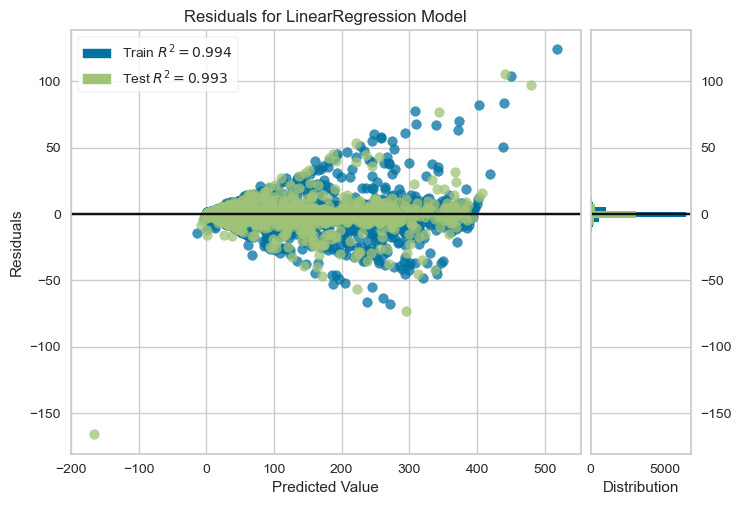

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [281]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = ResidualsPlot(lm_multiple)
visualizer.fit(X_train[bs_ordered.variables], y_train)  
visualizer.score(X_test[bs_ordered.variables], y_test) 
visualizer.poof()

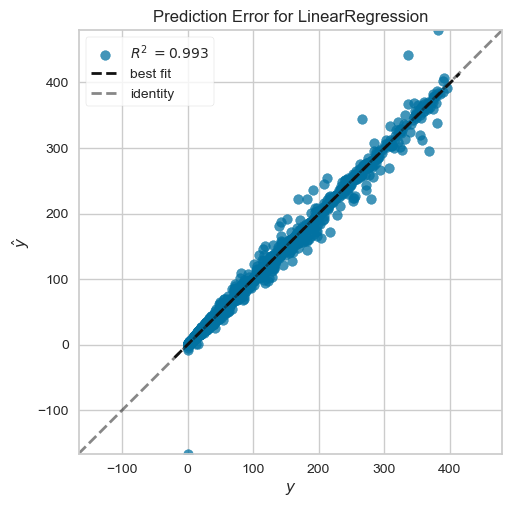

<Axes: title={'center': 'Prediction Error for LinearRegression'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [282]:
visualizer = PredictionError(lm_multiple)
visualizer.fit(X_train[bs_ordered.variables], y_train)  # Fit the training data to the visualizer
visualizer.score(X_test[bs_ordered.variables], y_test)  # Evaluate the model on the test data
visualizer.poof() 

In [291]:
from sklearn.linear_model import Ridge

# Fitting the Ridge Regression model
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization
ridge_model.fit(X_train[bs_ordered.variables], y_train)

# Interpretation of coefficients
coefficients = pd.DataFrame({'Features': bs_ordered.variables, 'Coefficients': ridge_model.coef_})
print('ridge model')
print(coefficients)

# Model evaluation
y_pred_ridge = ridge_model.predict(X_test[bs_ordered.variables])
r2_ridge = ridge_model.score(X_test[bs_ordered.variables], y_test)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print("R-squared (Ridge Regression):", r2_ridge)
print("RMSE (Ridge Regression):", rmse_ridge)
regressionSummary(y_test, y_pred_ridge)

ridge model
                          Features  Coefficients
5        largestpropertyusetypegfa     -0.352903
3               siteenergyuse_kbtu      3.165229
6                  electricity_kwh     19.136484
9         secondlargestpropertyuse     -0.215087
1                   numberoffloors     -0.186900
10  thirdlargestpropertyusetypegfa      0.256696
8                naturalgas_therms     67.536404
4                sourceeui_kbtu_sf     -0.218789
0                          zipcode     -0.119195
7                    steamuse_kbtu     24.168827
2                numberofbuildings     -0.773435
R-squared (Ridge Regression): 0.9931894648328413
RMSE (Ridge Regression): 6.368825959577411

Regression statistics

               Mean Error (ME) : 0.0085
Root Mean Squared Error (RMSE) : 6.3688
     Mean Absolute Error (MAE) : 2.2809


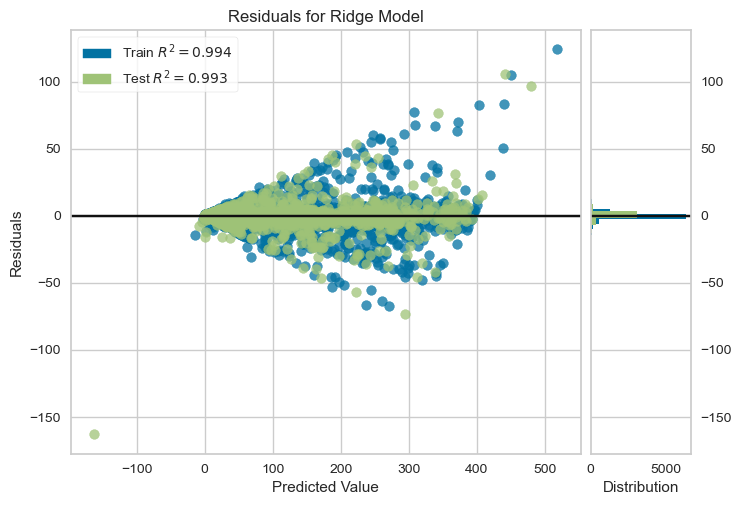

<Axes: title={'center': 'Residuals for Ridge Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [285]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = ResidualsPlot(ridge_model)
visualizer.fit(X_train[bs_ordered.variables], y_train)  
visualizer.score(X_test[bs_ordered.variables], y_test) 
visualizer.poof()

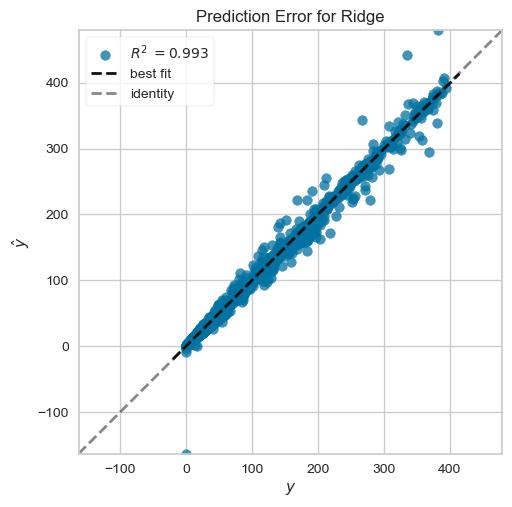

<Axes: title={'center': 'Prediction Error for Ridge'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [286]:
visualizer = PredictionError(ridge_model)
visualizer.fit(X_train[bs_ordered.variables], y_train)  # Fit the training data to the visualizer
visualizer.score(X_test[bs_ordered.variables], y_test)  # Evaluate the model on the test data
visualizer.poof() 

In [293]:
from sklearn.ensemble import RandomForestRegressor

# Fitting the Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of estimators
rf_model.fit(X_train[bs_ordered.variables], y_train)

# Interpretation of feature importances
feature_importances = pd.DataFrame({'Features': bs_ordered.variables, 'Importance': rf_model.feature_importances_})
print('random forest regressor')
#print(feature_importances)

# Model evaluation
y_pred_rf = rf_model.predict(X_test[bs_ordered.variables])
r2_rf = rf_model.score(X_test[bs_ordered.variables], y_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("R-squared (Random Forest Regression):", r2_rf)
print("RMSE (Random Forest Regression):", rmse_rf)
regressionSummary(y_test, y_pred_rf)

random forest regressor
R-squared (Random Forest Regression): 0.9961503695186555
RMSE (Random Forest Regression): 4.788266164053923

Regression statistics

               Mean Error (ME) : 0.1045
Root Mean Squared Error (RMSE) : 4.7883
     Mean Absolute Error (MAE) : 1.8749


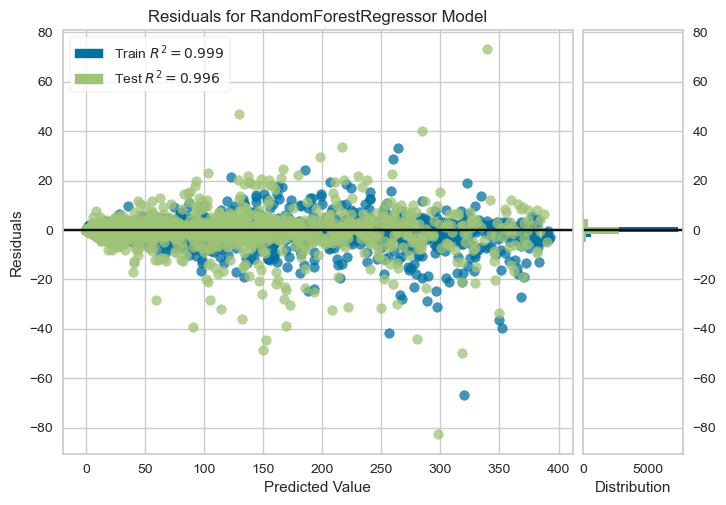

<Axes: title={'center': 'Residuals for RandomForestRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [287]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = ResidualsPlot(rf_model)
visualizer.fit(X_train[bs_ordered.variables], y_train)  
visualizer.score(X_test[bs_ordered.variables], y_test) 
visualizer.poof()

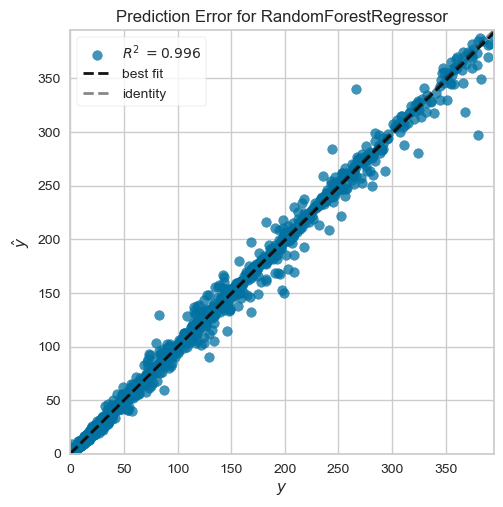

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [294]:
visualizer = PredictionError(rf_model)
visualizer.fit(X_train[bs_ordered.variables], y_train)  # Fit the training data to the visualizer
visualizer.score(X_test[bs_ordered.variables], y_test)  # Evaluate the model on the test data
visualizer.poof() 